In [1]:
from ramlab.molecules.H2 import H2
import matplotlib.pyplot as plt
import wedme.apply.dev
import numpy as np
from ramlab.simulate.simulation import simulate

M = H2

# Select the 5000 most intense transitions
transitions = M.get_all_transitions(laser_wavelength=532.5e-9, force_recalculate=True)
transitions = transitions.sortby("crosssection", ascending=False)[:5000] 

# transitions = transitions[transitions.dv == 0]

# Calculate the intensity of the transitions for T=860 K
I_stick = M.get_intensity(transitions, T=3000)
dnu_stick = transitions.vacuum_wavenumber

# Simulate the spectrum with Gaussian and Lorentzian broadening
dnu_sim = np.linspace(dnu_stick.min(), dnu_stick.max(), 500)
I_sim = simulate(dnu_sim, dnu_stick, I_stick, 1, 0, N_bin=10)

Generating linelist file...


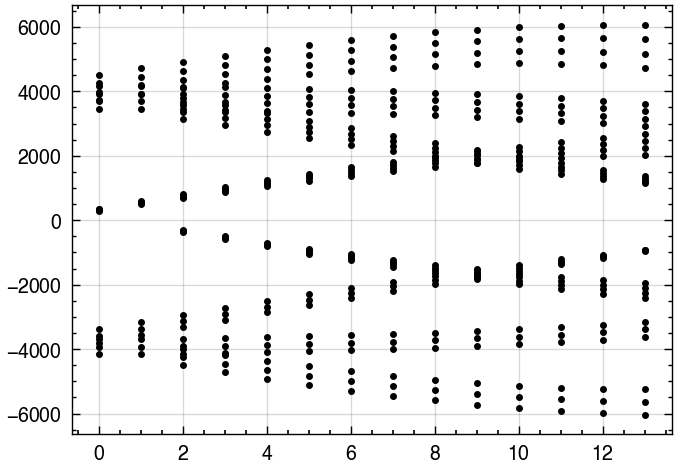

In [2]:
plt.figure()
plt.plot(transitions.initial_J, transitions.dE, 'k.')

In [3]:
print(f"{-8:10.2e}")

 -8.00e+00


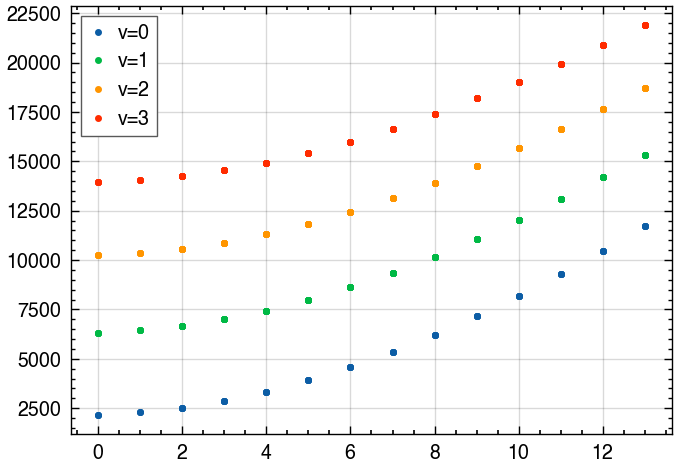

In [4]:
plt.figure()

for v in [0, 1, 2, 3]:
    idx = transitions.initial_v == v
    plt.plot(transitions.state_initial.J[idx], transitions.state_initial.E[idx], '.', label=f"v={v}")

plt.legend()
plt.show()

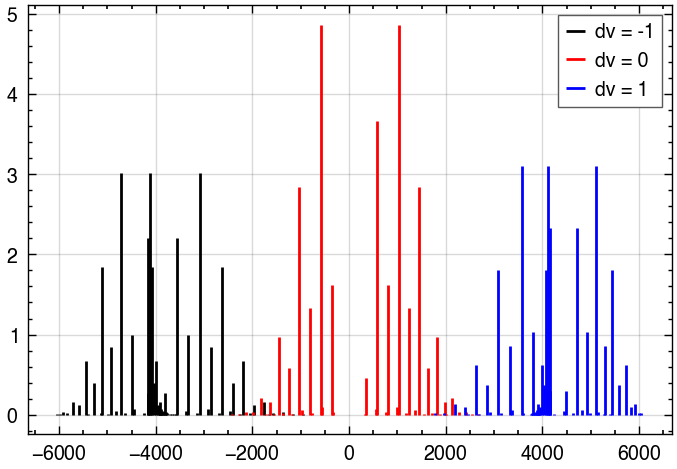

In [5]:
plt.figure()

# for i, dJ in enumerate([-2, 0, 2]):
for i, dv in enumerate([-1, 0, 1]):
    transitions_i = transitions[transitions.final_v - transitions.initial_v == dv]

    I_stick_i = M.get_intensity(transitions_i, T=1500)
    dnu_stick_i = transitions_i.vacuum_wavenumber

    plt.vlines(dnu_stick_i, 0, I_stick_i / np.nanmax(I_stick), color=["k", "r", "b"][i], label=f"dv = {dv}")
    # plt.vlines(dnu_stick_i, 0, I_stick_i / np.nanmax(I_stick), color=["k", "r", "b"][i], label=f"dJ = {dJ}")
plt.legend()
plt.show()

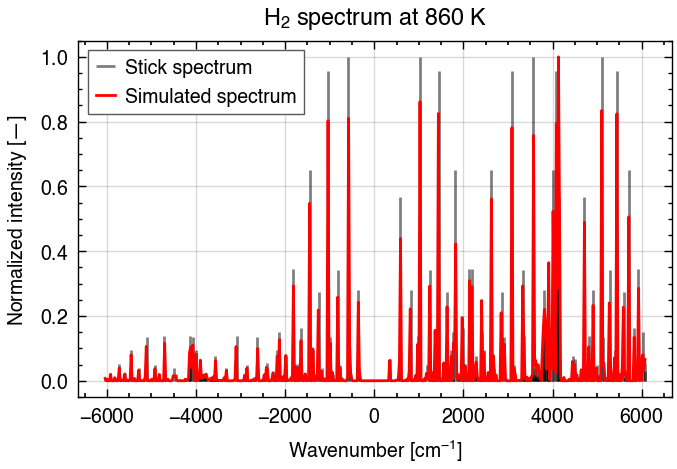

In [6]:
# Plot the results
plt.figure()
plt.vlines(dnu_stick, 0, I_stick / np.nanmax(I_stick), color="k", alpha=0.5, label="Stick spectrum")
plt.plot(dnu_sim, I_sim / np.nanmax(I_sim), color="r", label="Simulated spectrum")
plt.legend()
plt.xlabel(r"Wavenumber [$\mathrm{cm^{-1}}$]")
plt.ylabel(r"Normalized intensity [$\mathrm{\emdash}$]")
plt.title(r"$\mathregular{H_2}$ spectrum at 860 K")
plt.show()